In [5]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, filters, feature
from skimage.color import rgb2gray
from sklearn.decomposition import PCA
% matplotlib inline

UsageError: Line magic function `%` not found.


In [14]:
# Based on Work of https://github.com/robmarkcole/satellite-image-deep-learning/blob/master/change_detection/using_pca_and_k_means/change_detection.ipynb
image1 = io.imread('http://landsat-pds.s3.amazonaws.com/c1/L8/169/056/LC08_L1TP_169056_20190312_20190325_01_T1/LC08_L1TP_169056_20190312_20190325_01_T1_B5.TIF')
image2 = io.imread('http://landsat-pds.s3.amazonaws.com/c1/L8/169/056/LC08_L1TP_169056_20140125_20170426_01_T1/LC08_L1TP_169056_20140125_20170426_01_T1_B5.TIF')

diff_image = abs(image1 - image2)
print(diff_image.shape)

#fp = r"http://landsat-pds.s3.amazonaws.com/c1/L8/169/056/LC08_L1TP_169056_20190312_20190325_01_T1/LC08_L1TP_169056_20190312_20190325_01_T1_B5.TIF"

(7761, 7601)


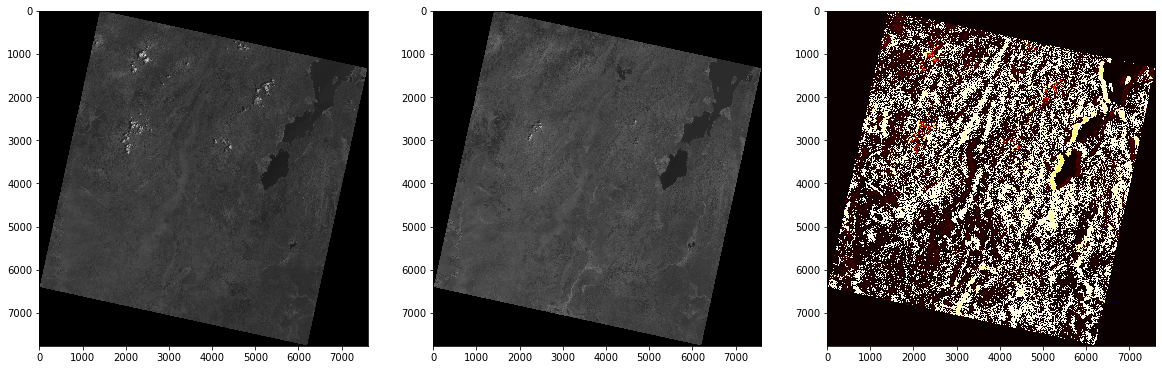

In [9]:
fig_width = 20
fig_height = 8

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(fig_width, fig_height))
ax1.imshow(image1, cmap="gray") 
ax2.imshow(image2, cmap="gray") 
ax3.imshow(diff_image, cmap="hot"); # crudely calc difference

### Determine Principle components
The original article rolls its own methods for calculating the principle components of the difference image, but sklearn provides us that functionality

In [10]:
n_components=100

pca = PCA(n_components=n_components)
pca.fit(diff_image)

diff_image_pca = pca.fit_transform(diff_image)
print(diff_image_pca.shape)

diff_image_restored = pca.inverse_transform(diff_image_pca)
print(diff_image_restored.shape)

(7761, 100)
(7761, 7601)


In [11]:
np.sum(pca.explained_variance_ratio_)

0.47868745822761133

In [12]:
print(f"The {n_components} components explain {int(np.sum(pca.explained_variance_ratio_) * 100)}% of the variance")

The 100 components explain 47% of the variance


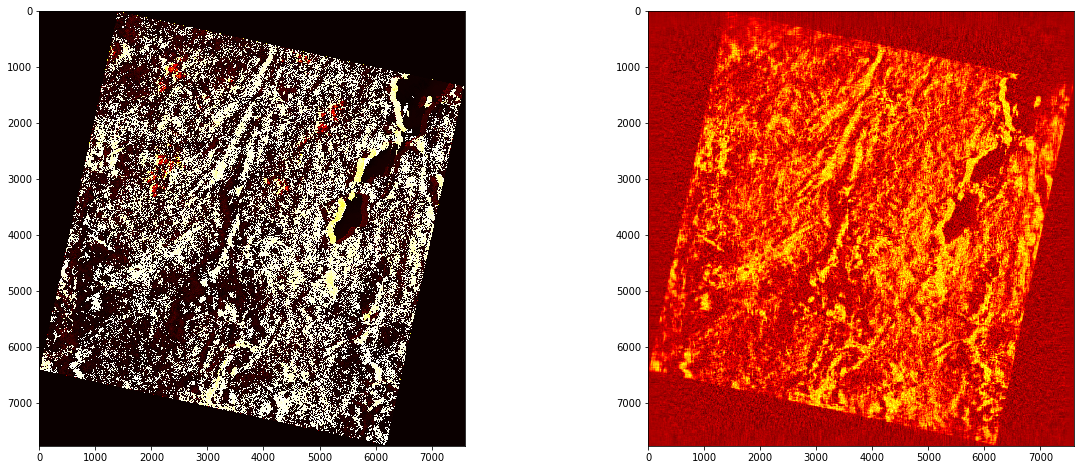

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, fig_height))

ax1.imshow(diff_image, cmap="hot") 
ax2.imshow(diff_image_restored, cmap="hot"); # crudely calc difference

In [15]:
url1 = 'http://landsat-pds.s3.amazonaws.com/c1/L8/169/056/LC08_L1TP_169056_20140125_20170426_01_T1/LC08_L1TP_169056_20140125_20170426_01_T1_B3.TIF'
url2 = 'http://landsat-pds.s3.amazonaws.com/c1/L8/169/056/LC08_L1TP_169056_20140125_20170426_01_T1/LC08_L1TP_169056_20140125_20170426_01_T1_B4.TIF'
url3 = 'http://landsat-pds.s3.amazonaws.com/c1/L8/169/056/LC08_L1TP_169056_20140125_20170426_01_T1/LC08_L1TP_169056_20140125_20170426_01_T1_B5.TIF'
url4 = 'http://landsat-pds.s3.amazonaws.com/c1/L8/169/056/LC08_L1TP_169056_20140125_20170426_01_T1/LC08_L1TP_169056_20140125_20170426_01_T1_B6.TIF'


In [45]:
from glob import glob

In [46]:
BandList = glob.glob('http://landsat-pds.s3.amazonaws.com/c1/L8/169/056/LC08_L1TP_169056_20140125_20170426_01_T1/*.tif')

AttributeError: 'function' object has no attribute 'glob'

In [47]:
all_landsat_bands = glob.glob("*.TIF")
#all_landsat_bands.sort()

AttributeError: 'function' object has no attribute 'glob'

In [48]:
BandList = sorted(BandList)

In [44]:
all_landsat_bands.sort()

In [16]:
url1 = 'b3'
url2 = 'b4'
url3 = 'b5'
url4 = 'b6'

In [27]:
import numpy as np
rgb = np.stack((b5, b4, b3)

SyntaxError: unexpected EOF while parsing (<ipython-input-27-7ede98431530>, line 2)

In [38]:
import glob
import numpy as np
import gdalnumeric
import matplotlib.pyplot as plt

In [ ]:
BandList = glob.glob('*.TIF')
# returns: ['B4.TIF', 'B6.TIF', 'B3.TIF', 'B5.TIF', 'B1.TIF', 'B7.TIF', 'B2.TIF']

BandList = sorted(BandList)
# returns: ['B1.TIF', 'B2.TIF', 'B3.TIF', 'B4.TIF', 'B5.TIF', 'B6.TIF', 'B7.TIF']

RGB_Image = np.dstack((gdalnumeric.LoadFile(BandList[3]), gdalnumeric.LoadFile(BandList[2]), gdalnumeric.LoadFile(BandList[1]))).astype('uint8')

plt.figure(figsize=(3, 3))
plt.imshow(RGB_Image, interpolation='nearest')
plt.savefig('TestImage.png', format='png', dpi=300, bbox_inches='tight')
plt.close()